In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [4]:
print(tf. __version__)

2.12.0


# Defining the path of dataset directory

In [6]:
dataset_path = "F:/python code/temporary/dataset/rice_leaf_diseases/train"

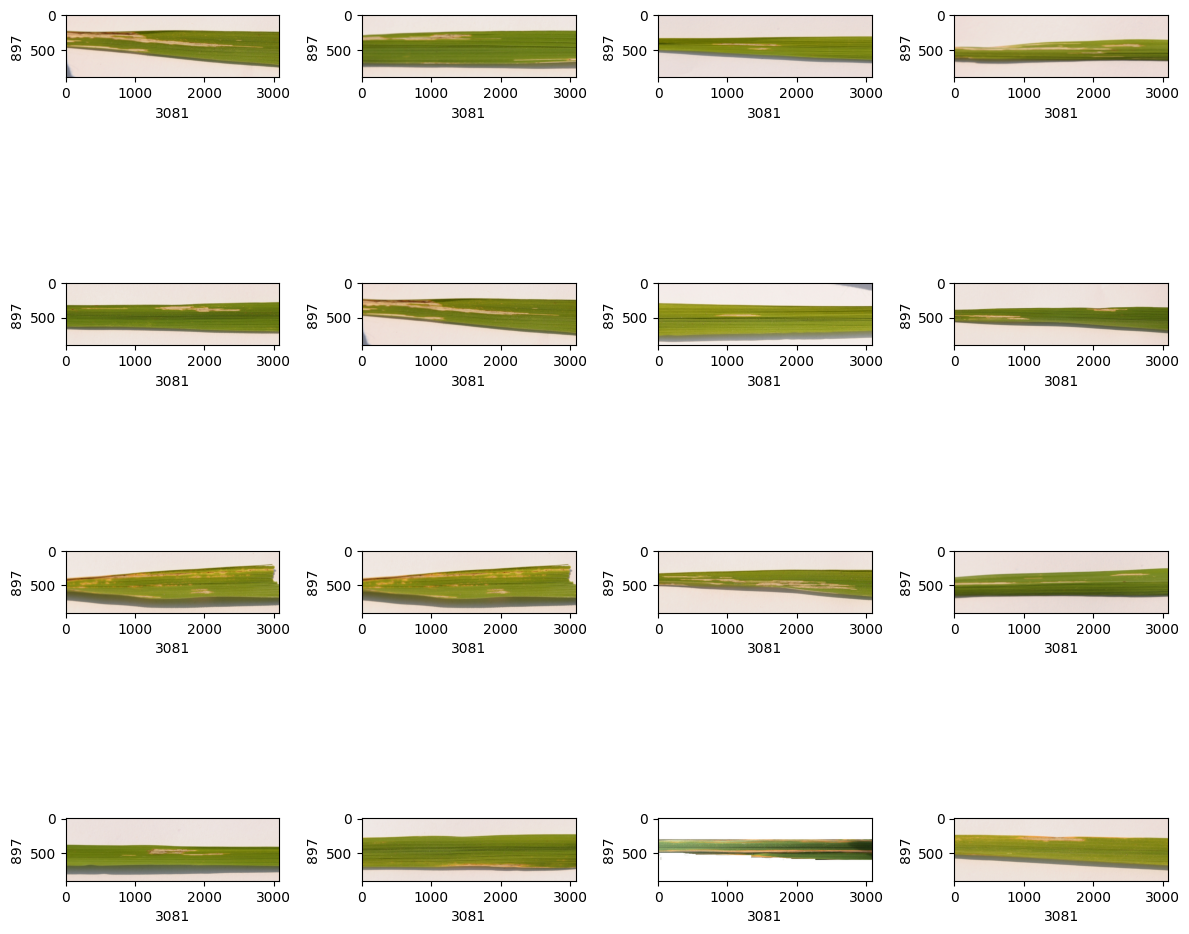

In [7]:
# Plotting 12 images to check dataset

plt.figure(figsize = (12, 12))
dataset_path = "F:/python code/temporary/dataset/rice_leaf_diseases/train/Rice-Bacterial leaf blight"

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(dataset_path +'/'+ random.choice(sorted(os.listdir(dataset_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

# Convert the images into a Numpy array and normalize them

In [8]:
# Converting Images to array 

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 256))  
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [9]:
dataset_path = "F:/python code/temporary/dataset/rice_leaf_diseases/train"
labels = os.listdir(dataset_path)

print(labels)

['Rice-Bacterial leaf blight', 'Rice-Brown spot', 'Rice-Leaf smut']


In [10]:
dataset_path = "F:/python code/temporary/dataset/rice_leaf_diseases/train"
root_dir = listdir(dataset_path)
image_list, label_list = [], []
all_labels = ['Rice-Bacterial leaf blight', 'Rice-Brown spot', 'Rice-Leaf smut']
binary_labels = [0, 1, 2]
temp = -1

# Reading and converting image to numpy array

for directory in root_dir:
  plant_image_list = listdir(f"{dataset_path}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dataset_path}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

# Visualize the class count and Check for class imbalance

In [11]:
# Visualize the number of classes count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    40
1    40
2    40
dtype: int64

In [12]:
# Next we will observe the shape of the image.

image_list[0].shape

(256, 256, 3)

In [13]:
# Checking the total number of the images which is the length of the labels list.

label_list = np.array(label_list)
label_list.shape

(120,)

# Splitting the dataset into train, validate and test sets

In [14]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [15]:
# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

# Performing one-hot encoding on target variable

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
# Splitting the training data set into training and validation data sets

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

# Creating the model architecture, compile the model and then fit it using the training data

In [44]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding = "same",input_shape = (256, 256, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(32, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 85, 85, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 85, 85, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 42, 42, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 56448)             0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [45]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

In [46]:
# Training the model

epochs = 80
batch_size = 16
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/80
5/5 [==============================] - 5s 841ms/step - loss: 1.2624 - accuracy: 0.3947 - val_loss: 1.1477 - val_accuracy: 0.2500
Epoch 2/80
5/5 [==============================] - 4s 884ms/step - loss: 1.1183 - accuracy: 0.3289 - val_loss: 1.0830 - val_accuracy: 0.2500
Epoch 3/80
5/5 [==============================] - 4s 753ms/step - loss: 1.0353 - accuracy: 0.5000 - val_loss: 0.9837 - val_accuracy: 0.6500
Epoch 4/80
5/5 [==============================] - 4s 730ms/step - loss: 1.0102 - accuracy: 0.5526 - val_loss: 0.9977 - val_accuracy: 0.6000
Epoch 5/80
5/5 [==============================] - 4s 811ms/step - loss: 0.9552 - accuracy: 0.5789 - val_loss: 0.9388 - val_accuracy: 0.6500
Epoch 6/80
5/5 [==============================] - 5s 908ms/step - loss: 0.9161 - accuracy: 0.6184 - val_loss: 0.9178 - val_accuracy: 0.8000
Epoch 7/80
5/5 [==============================] - 4s 765ms/step - loss: 0.8682 - accuracy: 0.7237 - val_loss: 0.8499 - val_accuracy: 0.7500
Epoch 8/80
5/5 [====

5/5 [==============================] - 5s 888ms/step - loss: 0.0573 - accuracy: 1.0000 - val_loss: 0.7714 - val_accuracy: 0.6500
Epoch 60/80
5/5 [==============================] - 5s 1s/step - loss: 0.0510 - accuracy: 1.0000 - val_loss: 0.7868 - val_accuracy: 0.7500
Epoch 61/80
5/5 [==============================] - 4s 884ms/step - loss: 0.0540 - accuracy: 1.0000 - val_loss: 0.7181 - val_accuracy: 0.7500
Epoch 62/80
5/5 [==============================] - 5s 987ms/step - loss: 0.0546 - accuracy: 1.0000 - val_loss: 0.7404 - val_accuracy: 0.7500
Epoch 63/80
5/5 [==============================] - 4s 844ms/step - loss: 0.0518 - accuracy: 1.0000 - val_loss: 0.8091 - val_accuracy: 0.7500
Epoch 64/80
5/5 [==============================] - 4s 864ms/step - loss: 0.0448 - accuracy: 1.0000 - val_loss: 0.7846 - val_accuracy: 0.7000
Epoch 65/80
5/5 [==============================] - 5s 874ms/step - loss: 0.0400 - accuracy: 1.0000 - val_loss: 0.7919 - val_accuracy: 0.7500
Epoch 66/80
5/5 [===========

In [55]:
model.save("F:/python code/temporary/model/rice_disease_prediction_model.h5")

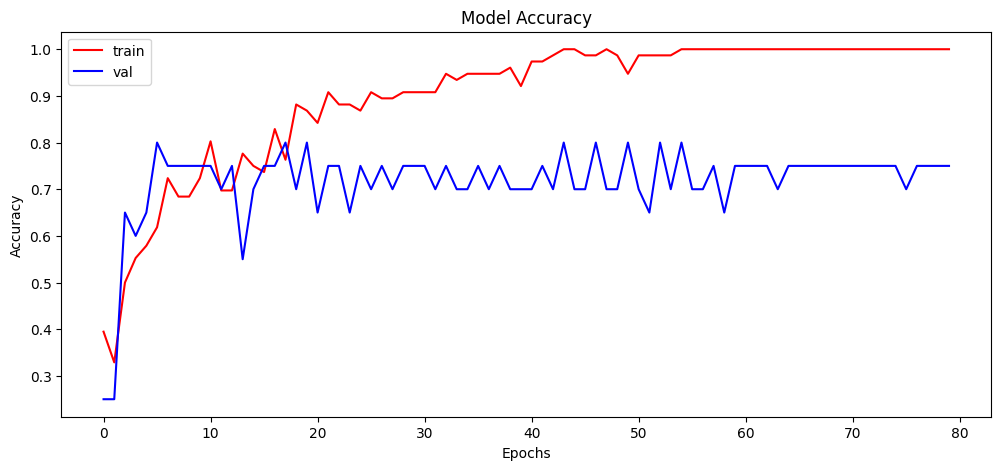

In [47]:
# Plot the training history

plt.figure(figsize = (12, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [48]:
print("Calculating model accuracy")

scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}")

Calculating model accuracy
1/1 [==============================] - 0s 337ms/step - loss: 1.3873 - accuracy: 0.7083
Test Accuracy: 70.83333134651184


In [49]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 497ms/step


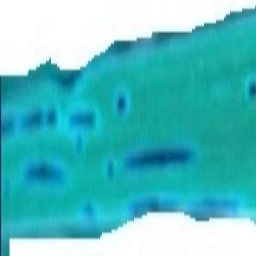

In [50]:
# Plotting image to compare

img = array_to_img(x_test[11])
img

In [51]:
# Finding max value from predition list and comaparing original value vs predicted

print("Originally : ", all_labels[np.argmax(y_test[11])])
print("Predicted : ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Originally :  Rice-Brown spot
Predicted :  Rice-Leaf smut
[1.1289350e-04 7.4097979e-01 2.5890732e-01]


In [54]:
for i in range(16):
    print (all_labels[np.argmax(y_test[i])], " ", all_labels[np.argmax(y_pred [1])])

Rice-Brown spot   Rice-Brown spot
Rice-Brown spot   Rice-Brown spot
Rice-Brown spot   Rice-Brown spot
Rice-Leaf smut   Rice-Brown spot
Rice-Leaf smut   Rice-Brown spot
Rice-Brown spot   Rice-Brown spot
Rice-Leaf smut   Rice-Brown spot
Rice-Leaf smut   Rice-Brown spot
Rice-Brown spot   Rice-Brown spot
Rice-Bacterial leaf blight   Rice-Brown spot
Rice-Brown spot   Rice-Brown spot
Rice-Brown spot   Rice-Brown spot
Rice-Leaf smut   Rice-Brown spot
Rice-Brown spot   Rice-Brown spot
Rice-Leaf smut   Rice-Brown spot
Rice-Bacterial leaf blight   Rice-Brown spot
